We create a star cluster that mostly fills all 9 detectors. We use a 
MAORY-like J-band PSF that is uniform over the whole filed. We set the exposure time so
the brightest sources have a peak of about 10000-20000 counts. 

The PSF used here is a MAORY-like PSF with a Strehl of 7% (PSF_MCAO_J_Strehl7.fits). It must be located where SimCADO can find it

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import simcado
print(simcado.__data_dir__)

/home/mverdugo/simcado_work/simcado/data


### Generating the star cluster
``simcado.source.cluster`` generates a star cluster with age=0. As such it produces a few very bright stars that will peak at high photon counts. To have more visible sources I added few of these clusters thus generating a stellar cluster with a mass of $1.5\times 10^{5}\, M_\odot$

In [2]:
src = simcado.source.cluster(mass=1E4, distance=2e6,  half_light_radius=200)

for i in range(15):
    src = src + simcado.source.cluster(mass=1E4, distance=3e6,  half_light_radius=250)

t_exp = 10  #s
sim_hdu = simcado.run(src, OBS_DIT=t_exp, detector_layout="full",
                      INST_FILTER_TC="TC_filter_J.dat", 
                      SCOPE_PSF_FILE="PSF_MCAO_J_Strehl7.fits",
                      FPA_LINEARITY_CURVE=None)

Detector layout
 id x_cen  y_cen   xhw   yhw  x_len y_len pixsize angle gain
--- ------ ------ ----- ----- ----- ----- ------- ----- ----
  1 -63.84  63.84 30.72 30.72  4096  4096   0.015   0.0  1.0
  2    0.0  63.84 30.72 30.72  4096  4096   0.015   0.0  1.0
  3  63.84  63.84 30.72 30.72  4096  4096   0.015   0.0  1.0
  4  63.84    0.0 30.72 30.72  4096  4096   0.015   0.0  1.0
  5    0.0    0.0 30.72 30.72  4096  4096   0.015   0.0  1.0
  6  -79.5    0.0 30.72 30.72  4096  4096   0.015   0.0  1.0
  7 -63.84 -63.84 30.72 30.72  4096  4096   0.015   0.0  1.0
  8    0.0 -63.84 30.72 30.72  4096  4096   0.015   0.0  1.0
  9  63.84 -63.84 30.72 30.72  4096  4096   0.015   0.0  1.0
Creating 3 layer(s) per chip
9 chip(s) will be simulated
Generating image for chip 1
Generating image for chip 2
Generating image for chip 3
Generating image for chip 4
Generating image for chip 5
Generating image for chip 6
Generating image for chip 7
Generating image for chip 8
Generating image for chip 9
Read

### Plotting the whole array

Maximum value of chip 1 : 13034.732
Maximum value of chip 2 : 12322.293
Maximum value of chip 3 : 12255.758
Maximum value of chip 4 : 12289.978
Maximum value of chip 5 : 12352.98
Maximum value of chip 6 : 6991.6025
Maximum value of chip 7 : 12262.572
Maximum value of chip 8 : 26683.768
Maximum value of chip 9 : 12353.626


(-6000, 9000)

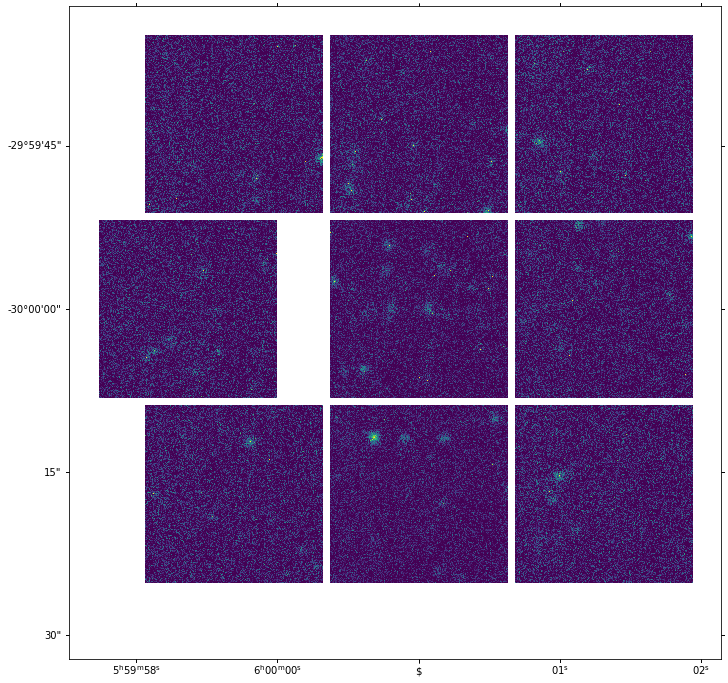

In [3]:
wcs = WCS(sim_hdu[5])  # center is with respect coordinate (0,0) of chip 5 

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1, projection=wcs)

for i in range(9):
    hdr = sim_hdu[i+1].header
    vmin = np.median(sim_hdu[i+1].data) 
    vmax = vmin + 5*np.std(sim_hdu[i+1].data)
    plt.imshow(sim_hdu[i+1].data, vmin=vmin, vmax=vmax,   
               transform=ax.get_transform(WCS(hdr)), origin="lower" )
    print("Maximum value of chip", i+1, ":",  np.max(sim_hdu[i+1].data))
    
plt.xlim(-6000, 9000)
plt.ylim(-6000, 9000)

In [4]:
# Saving the file
sim_hdu.writeto("star_cluster.fits", overwrite=True)